# Project: Investigate A Dataset – Movies

**Author:** Ken Norton (ken@kennethnorton.com)

## Introduction

I selected TMDb movie data (cleaned from original data on Kaggle). This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

* Certain columns, like `cast` and `genres`, contain multiple values separated by pipe (|) characters.
* There are some odd characters in the `cast` column. Don’t worry about cleaning them. You can leave them as is.
* The final two columns ending with `_adj` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

## Imports and settings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# PyPlot style sheets
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

# Format floats to show commas and two decimals
pd.options.display.float_format = "{0:,.2f}".format

## Data wrangling

### General properties

In [3]:
# Load your data and print out a few lines.
df = pd.read_csv('data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

How are the movies distributed by release year?

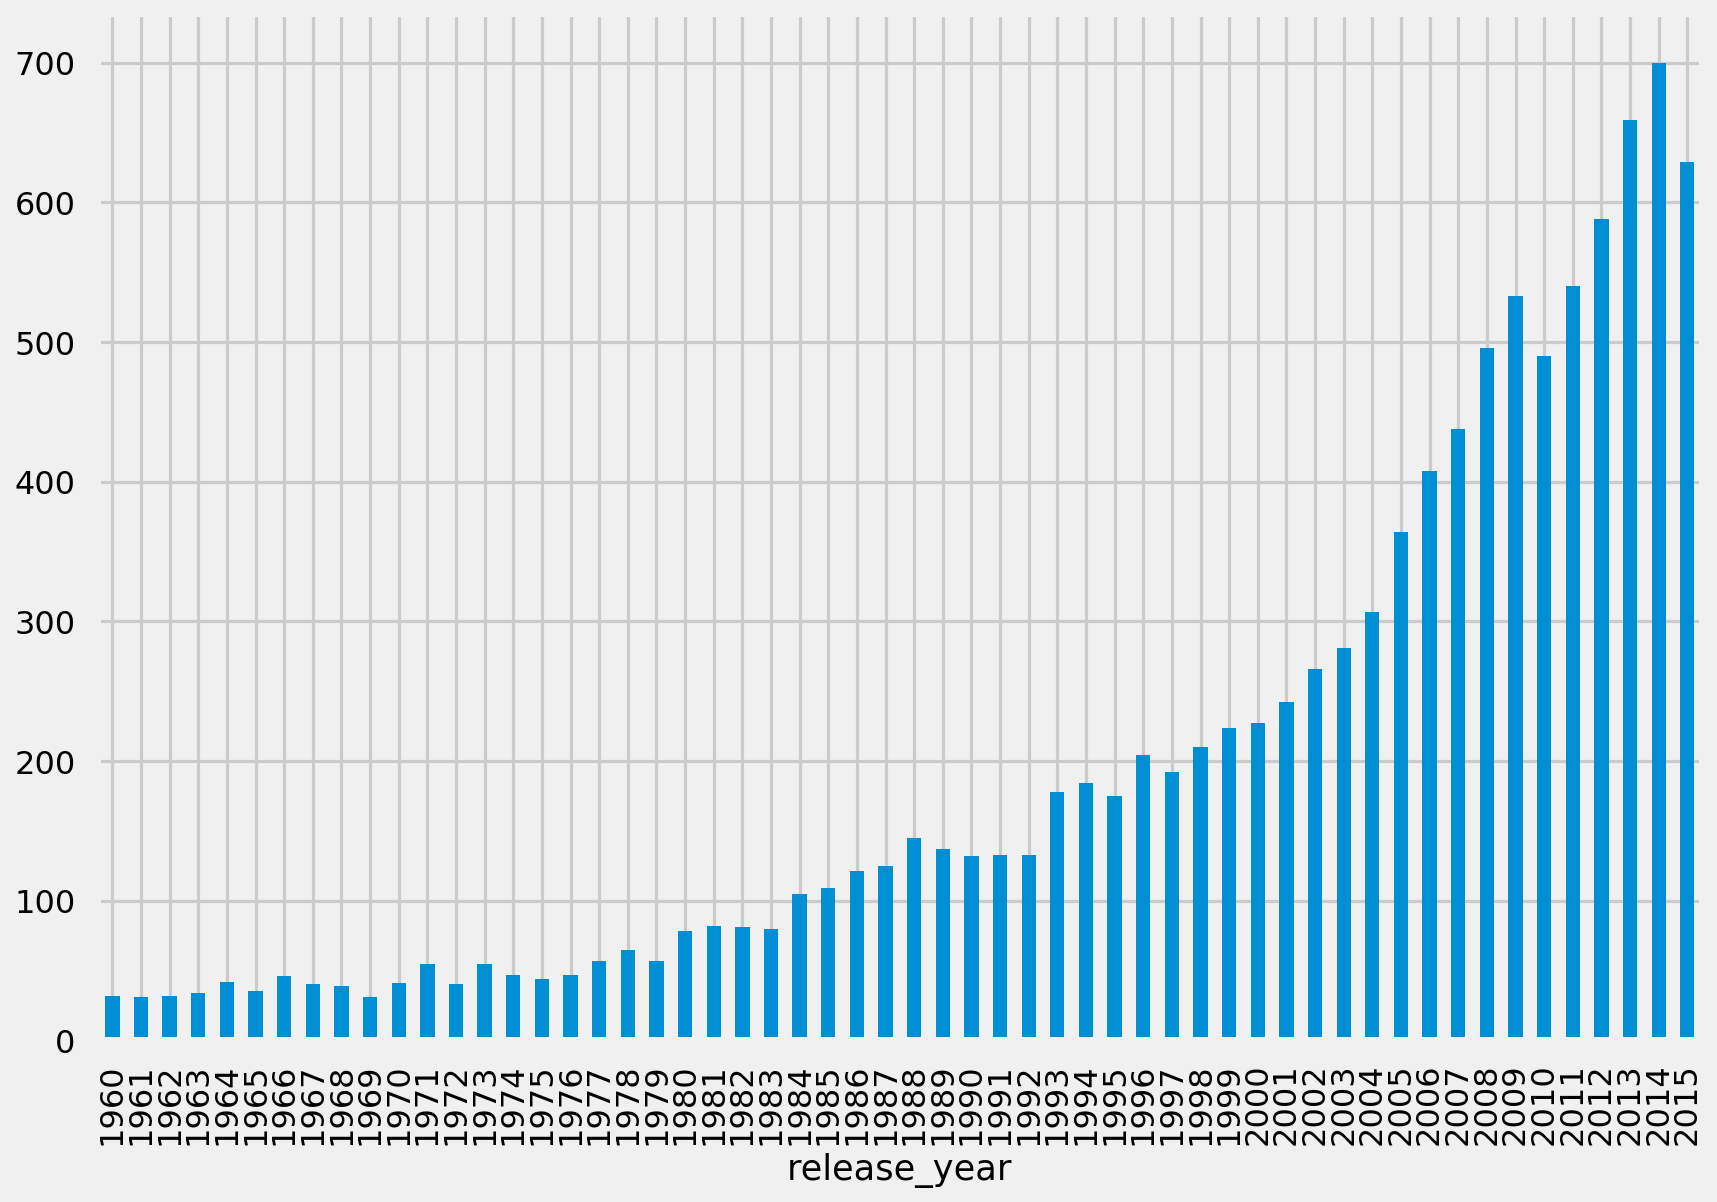

In [9]:
df.groupby('release_year')['id'].count().plot.bar()
plt.show()

## Data cleaning

### Eliminate duplicates

I noticed that there is at least one duplicate row (there are 10866 entries but only 10865 unique ids).

In [10]:
# Get rid of any duplicate rows
df.drop_duplicates(inplace=True)

### Fix datatypes

The `release_date` column is an object, but it should be a datetime.

In [11]:
df.release_date.head()

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [12]:
# Convert to a datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
df.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

### Add derived columns

I intend to look at profitability, so I'm going to add a `net_income` column.

In [14]:
df['revenue_adj'].describe()

count          10,865.00
mean       51,369,001.76
std       144,638,333.13
min                 0.00
25%                 0.00
50%                 0.00
75%        33,701,729.01
max     2,827,123,750.41
Name: revenue_adj, dtype: float64

In [15]:
df['budget_adj'].describe()

count        10,865.00
mean     17,549,894.04
std      34,307,526.66
min               0.00
25%               0.00
50%               0.00
75%      20,853,251.08
max     425,000,000.00
Name: budget_adj, dtype: float64

There are a lot of zeros and I don't want to include them in any income calculations. Here's a quick function to calculate net income *only* if both budget and revenue are greater than zero. I'll return `NaN` if not so I can easily drop those rows later.

Since I'm going to be comparing profits over time, I want to make sure to use the inflation-adjusted revenue and budget numbers. I'll be using the `_adj` columns.

In [16]:
# Calculate net income only if both budget_adj and revenue_adj are > 0
def income(row):
    if row['budget_adj'] > 0 and row['revenue_adj'] > 0:
        val = row['revenue_adj'] - row['budget_adj']
    else:
        val = float('NaN')
    return val

In [17]:
# Now run the function on every row to create a new column called net_income
df['net_income'] = df.apply(income, axis=1)

In [18]:
df.net_income.describe()

count           3,854.00
mean       92,824,697.22
std       194,071,459.74
min      -413,912,431.00
25%        -1,504,994.63
50%        27,370,641.16
75%       107,454,751.41
max     2,750,136,650.92
Name: net_income, dtype: float64

### Normalize overloaded columns

The `cast` and `genres` columns are pipe-delimited strings. I'm going to extract them into new dataframes and create lookup dataframes to handle the relationships.

In [19]:
# I found this function for flattening columns that contain
# multiple delimited values. It does exactly what I need.
# Found here: https://gist.github.com/jlln/338b4b0b55bd6984f883
def splitDataFrameList(df, target_column, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column 
    separated, with each element moved into a new row. 
    The values in the other columns are duplicated across 
    the newly divided rows.
    '''
    row_accumulator = []

    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)

    df.apply(splitListToRows, axis=1, args=(separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df

In [20]:
# Split and flatten the cast and genres categories
df_flat = splitDataFrameList(df.dropna(), 'cast', '|')
df_flat = splitDataFrameList(df_flat.dropna(), 'genres', '|')
df_flat = splitDataFrameList(df_flat.dropna(), 'keywords', '|')

In [21]:
df_flat.describe()

,budget,budget_adj,id,net_income,popularity,release_year,revenue,revenue_adj,runtime,vote_average,vote_count
count,"79,400.00","79,400.00","79,400.00","79,400.00","79,400.00","79,400.00","79,400.00","79,400.00","79,400.00","79,400.00","79,400.00"
mean,"60,724,919.60","63,757,724.78","49,444.64","172,223,733.42",2.03,"2,006.67","208,570,350.20","235,981,458.19",111.02,6.30,"1,110.75"
std,"59,801,738.44","59,404,434.38","70,693.56","295,085,244.58",2.46,8.49,"281,825,273.88","326,061,177.81",19.43,0.80,"1,377.22"
min,1.00,0.97,11.00,"-413,912,431.00",0.01,"1,961.00",43.00,43.00,63.00,2.20,10.00
25%,"17,000,000.00","19,387,960.85","4,464.00","5,387,689.10",0.76,"2,005.00","31,670,620.00","34,084,779.31",97.00,5.80,228.00
50%,"40,000,000.00","43,622,911.92","17,979.00","60,073,390.00",1.32,"2,009.00","101,371,017.00","110,662,825.91",108.00,6.30,560.00
75%,"85,000,000.00","91,941,878.45","60,308.00","210,161,353.21",2.49,"2,011.00","284,600,000.00","320,834,306.77",122.00,6.90,"1,527.00"
max,"425,000,000.00","425,000,000.00","333,348.00","2,750,136,650.92",32.99,"2,015.00","2,781,505,847.00","2,827,123,750.41",201.00,8.30,"9,767.00"


To keep things clean, I'm going to make separate dataframes:

* `df_film` will contain only columns I won't be summing or averaging (such as genre and cast)
* `df_vals` will contain the remaining columns

In [22]:
df_film = df_flat.drop(columns=[
    'budget', 'budget_adj', 'net_income', 'revenue', 'revenue_adj',
    'vote_average', 'vote_count'
])
df_film.head()

,cast,director,genres,homepage,id,imdb_id,keywords,original_title,overview,popularity,production_companies,release_date,release_year,runtime,tagline
0,Chris Pratt,Colin Trevorrow,Action,http://www.jurassicworld.com/,135397,tt0369610,monster,Jurassic World,Twenty-two years after the events of Jurassic ...,32.99,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,124,The park is open.
1,Chris Pratt,Colin Trevorrow,Action,http://www.jurassicworld.com/,135397,tt0369610,dna,Jurassic World,Twenty-two years after the events of Jurassic ...,32.99,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,124,The park is open.
2,Chris Pratt,Colin Trevorrow,Action,http://www.jurassicworld.com/,135397,tt0369610,tyrannosaurus rex,Jurassic World,Twenty-two years after the events of Jurassic ...,32.99,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,124,The park is open.
3,Chris Pratt,Colin Trevorrow,Action,http://www.jurassicworld.com/,135397,tt0369610,velociraptor,Jurassic World,Twenty-two years after the events of Jurassic ...,32.99,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,124,The park is open.
4,Chris Pratt,Colin Trevorrow,Action,http://www.jurassicworld.com/,135397,tt0369610,island,Jurassic World,Twenty-two years after the events of Jurassic ...,32.99,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,124,The park is open.


In [23]:
df_vals = df_flat.drop(columns=['genres', 'cast', 'keywords'])
df_vals.drop_duplicates(inplace=True)
df_vals.head()

,budget,budget_adj,director,homepage,id,imdb_id,net_income,original_title,overview,popularity,production_companies,release_date,release_year,revenue,revenue_adj,runtime,tagline,vote_average,vote_count
0,150000000,"137,999,939.28",Colin Trevorrow,http://www.jurassicworld.com/,135397,tt0369610,"1,254,445,953.24",Jurassic World,Twenty-two years after the events of Jurassic ...,32.99,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1513528810,"1,392,445,892.52",124,The park is open.,6.50,5562
100,150000000,"137,999,939.28",George Miller,http://www.madmaxmovie.com/,76341,tt1392190,"210,161,353.21",Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,28.42,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,378436354,"348,161,292.49",120,What a Lovely Day.,7.10,6185
200,110000000,"101,199,955.47",Robert Schwentke,http://www.thedivergentseries.movie/#insurgent,262500,tt2908446,"170,419,069.94",Insurgent,Beatrice Prior must confront her inner demons ...,13.11,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,295238201,"271,619,025.41",119,One Choice Can Destroy You,6.30,2480
275,200000000,"183,999,919.04",J.J. Abrams,http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,"1,718,723,210.76",Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,11.17,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,2068178225,"1,902,723,129.80",136,Every generation has a story.,7.50,5292
375,190000000,"174,799,923.09",James Wan,http://www.furious7.com/,168259,tt2820852,"1,210,948,878.38",Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,9.34,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1506249360,"1,385,748,801.47",137,Vengeance Hits Home,7.30,2947


## Exploratory data analysis

### Research Question: Which movies were most and least profitable?

What are the most profitable movies?

In [24]:
df_vals.sort_values(['net_income'], ascending=False)[[
    'id', 'original_title', 'budget_adj', 'revenue_adj', 'net_income'
]].head()

,id,original_title,budget_adj,revenue_adj,net_income
9910,11,Star Wars,"39,575,591.36","2,789,712,242.28","2,750,136,650.92"
10060,19995,Avatar,"240,886,902.89","2,827,123,750.41","2,586,236,847.52"
49789,597,Titanic,"271,692,064.21","2,506,405,735.42","2,234,713,671.21"
79025,9552,The Exorcist,"39,289,276.63","2,167,324,901.20","2,128,035,624.57"
77245,578,Jaws,"28,362,748.20","1,907,005,841.92","1,878,643,093.71"


What are the *least* profitable movies?

In [25]:
df_vals.sort_values(['net_income'], ascending=True)[[
    'id', 'original_title', 'budget_adj', 'revenue_adj', 'net_income'
]].head()

,id,original_title,budget_adj,revenue_adj,net_income
23771,46528,The Warrior's Way,"425,000,000.00","11,087,569.00","-413,912,431.00"
52909,57201,The Lone Ranger,"238,688,504.95","83,578,333.82","-155,110,171.13"
37094,50321,Mars Needs Moms,"145,409,706.39","37,799,503.28","-107,610,203.11"
59184,11619,Flushed Away,"161,168,704.59","69,723,654.08","-91,445,050.50"
76025,10153,Sphere,"100,327,160.18","17,523,810.64","-82,803,349.54"


According to this, _The Warrior's Way_ (2010) was the least profitable movie of all time, with a \\$425M budget and only \\$11M in revenue. Hold on, though, that seems suspiciously bad. According to [the film's Wikipedia page](https://en.wikipedia.org/wiki/The_Warrior%27s_Way), the movie had a budget of __\\$42M__, not \\$425M! The data is off by an order of magnitude. Still a turkey, but not a nine-figure turkey.

Finding inaccuracies in the dataset makes me question its quality. I'll proceed with caution when it comes to budget and revenue. Since this one is such an outlier, I'll manually correct it by just dropping the row and moving on.

In [26]:
# Drop The Warrior's Way (id=46528)
df_vals = df_vals[df_vals.id != 46528]

In [27]:
df_vals.sort_values(['net_income'], ascending=True)[[
    'id', 'original_title', 'budget_adj', 'revenue_adj', 'net_income'
]].head()

,id,original_title,budget_adj,revenue_adj,net_income
52909,57201,The Lone Ranger,"238,688,504.95","83,578,333.82","-155,110,171.13"
37094,50321,Mars Needs Moms,"145,409,706.39","37,799,503.28","-107,610,203.11"
59184,11619,Flushed Away,"161,168,704.59","69,723,654.08","-91,445,050.50"
76025,10153,Sphere,"100,327,160.18","17,523,810.64","-82,803,349.54"
56894,10077,A Sound of Thunder,"89,325,063.17","6,687,812.14","-82,637,251.03"


### Research Question: What was the most profitable movie each year?

To see what the most profitable movie was for each year in the dataset, I want to use groupby and then select the max, adding the index of each row to `idx`.

In [28]:
idx = df.groupby(['release_year'
                  ])['net_income'].transform(max) == df['net_income']
df[idx].sort_values(['release_year'], ascending=True)[[
    'id', 'original_title', 'release_year', 'budget_adj', 'net_income'
]]

,id,original_title,release_year,budget_adj,net_income
10143,967,Spartacus,1960,"88,475,609.49","353,902,437.95"
10110,12230,One Hundred and One Dalmatians,1961,"29,179,444.83","1,545,635,294.87"
9849,646,Dr. No,1962,"7,929,293.77","421,694,259.41"
10438,657,From Russia With Love,1963,"17,800,448.43","543,972,910.57"
9881,658,Goldfinger,1964,"24,605,935.94","853,474,463.61"
10690,15121,The Sound of Music,1965,"56,748,622.29","1,072,786,239.70"
10822,396,Who's Afraid of Virginia Woolf?,1966,"50,385,110.19","176,258,462.18"
10398,9325,The Jungle Book,1967,"26,147,054.96","1,319,404,004.03"
9719,62,2001: A Space Odyssey,1968,"75,227,563.38","280,319,033.83"
10725,642,Butch Cassidy and the Sundance Kid,1969,"35,665,585.21","572,485,481.13"


What's the distribution of net income by year?

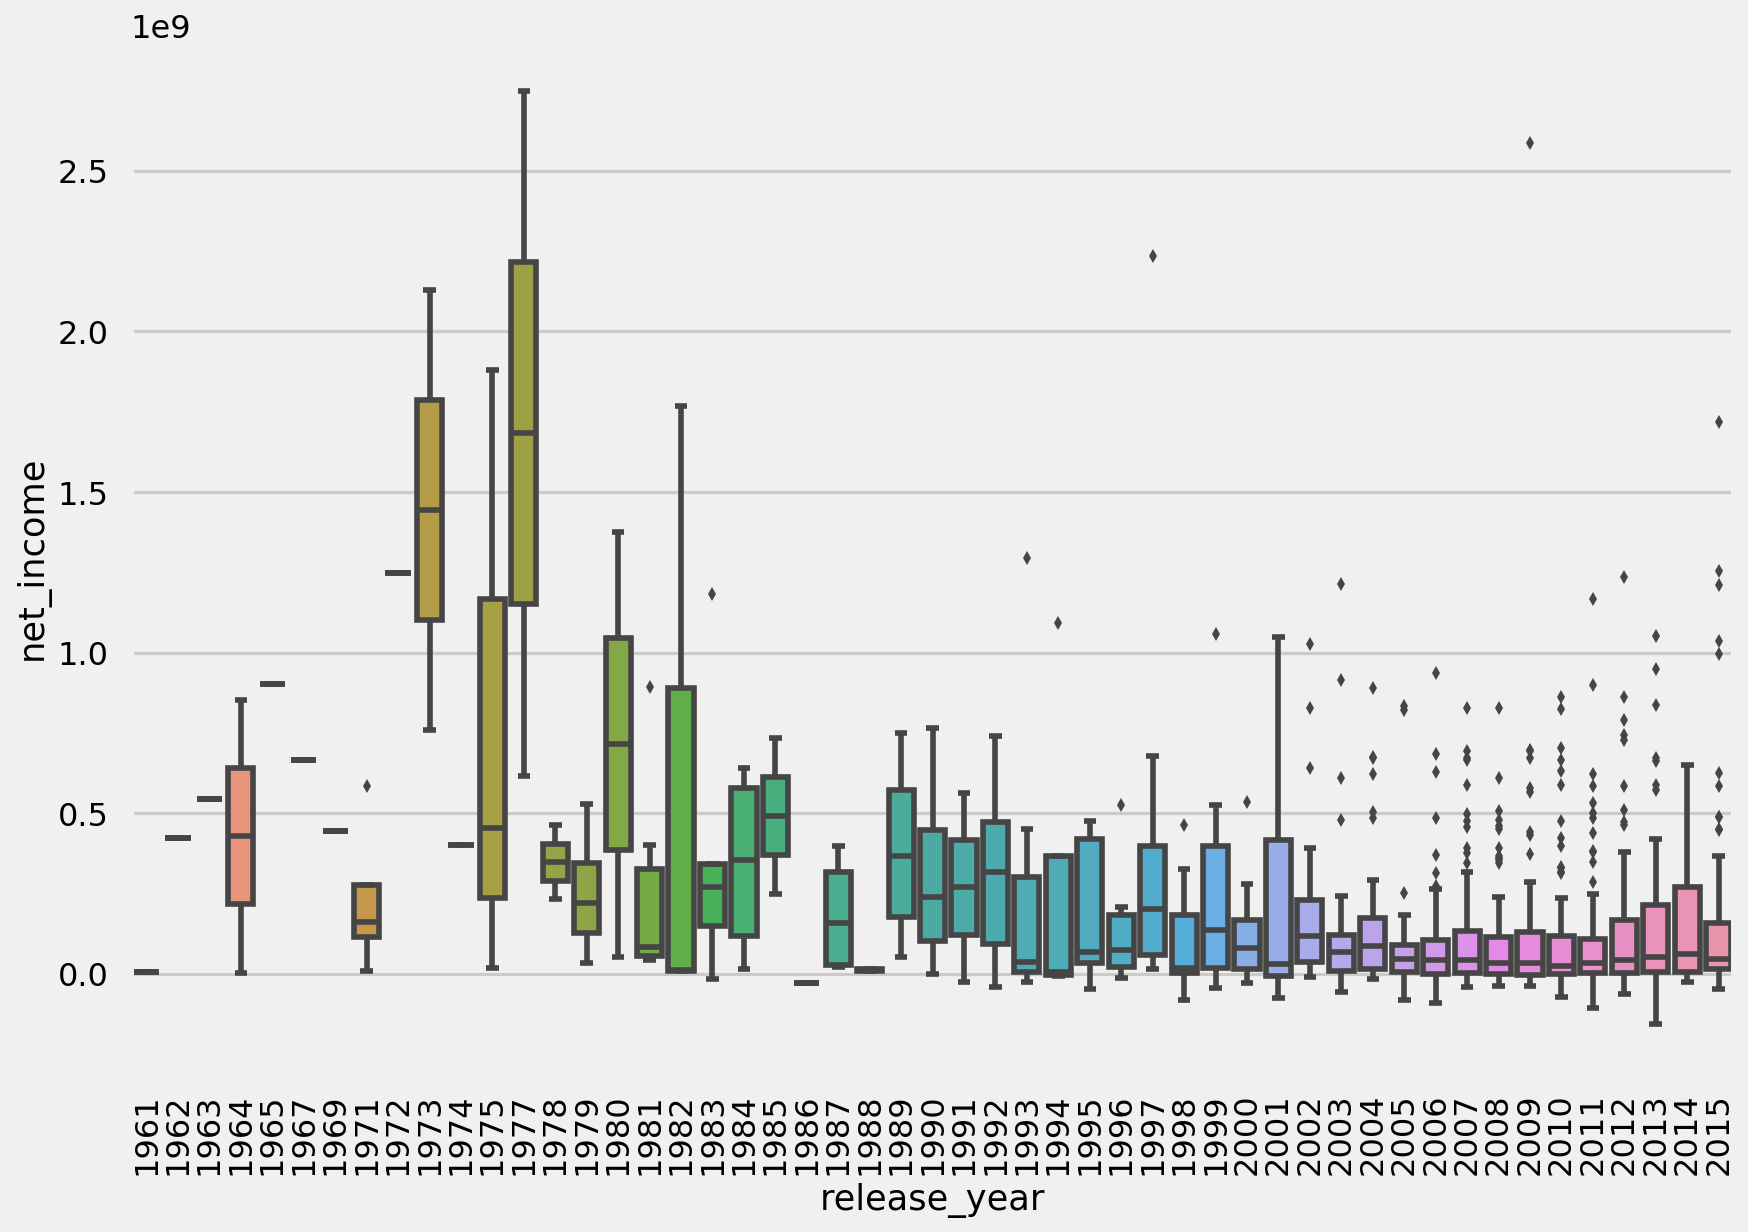

In [29]:
ax = sns.boxplot(x='release_year',
                 y='net_income',
                 data=df_vals)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

What's going on in the 1960s and 1970s? Well, for one thing there aren't many datapoints. In my bar chart above we can see there are fewer than 50 movies in the set for many of those years. And there are some big, profitable outliers, such as Jaws, The Exorcist, and Star Wars – 3 of the 5 most profitable movies in history!

This illustrates a limitation of boxplots: if your sample size is small, boxplots aren't as useful and can inflate underlying distributions.

So let's switch our boxplot to only show more recent years where we have plenty of data.

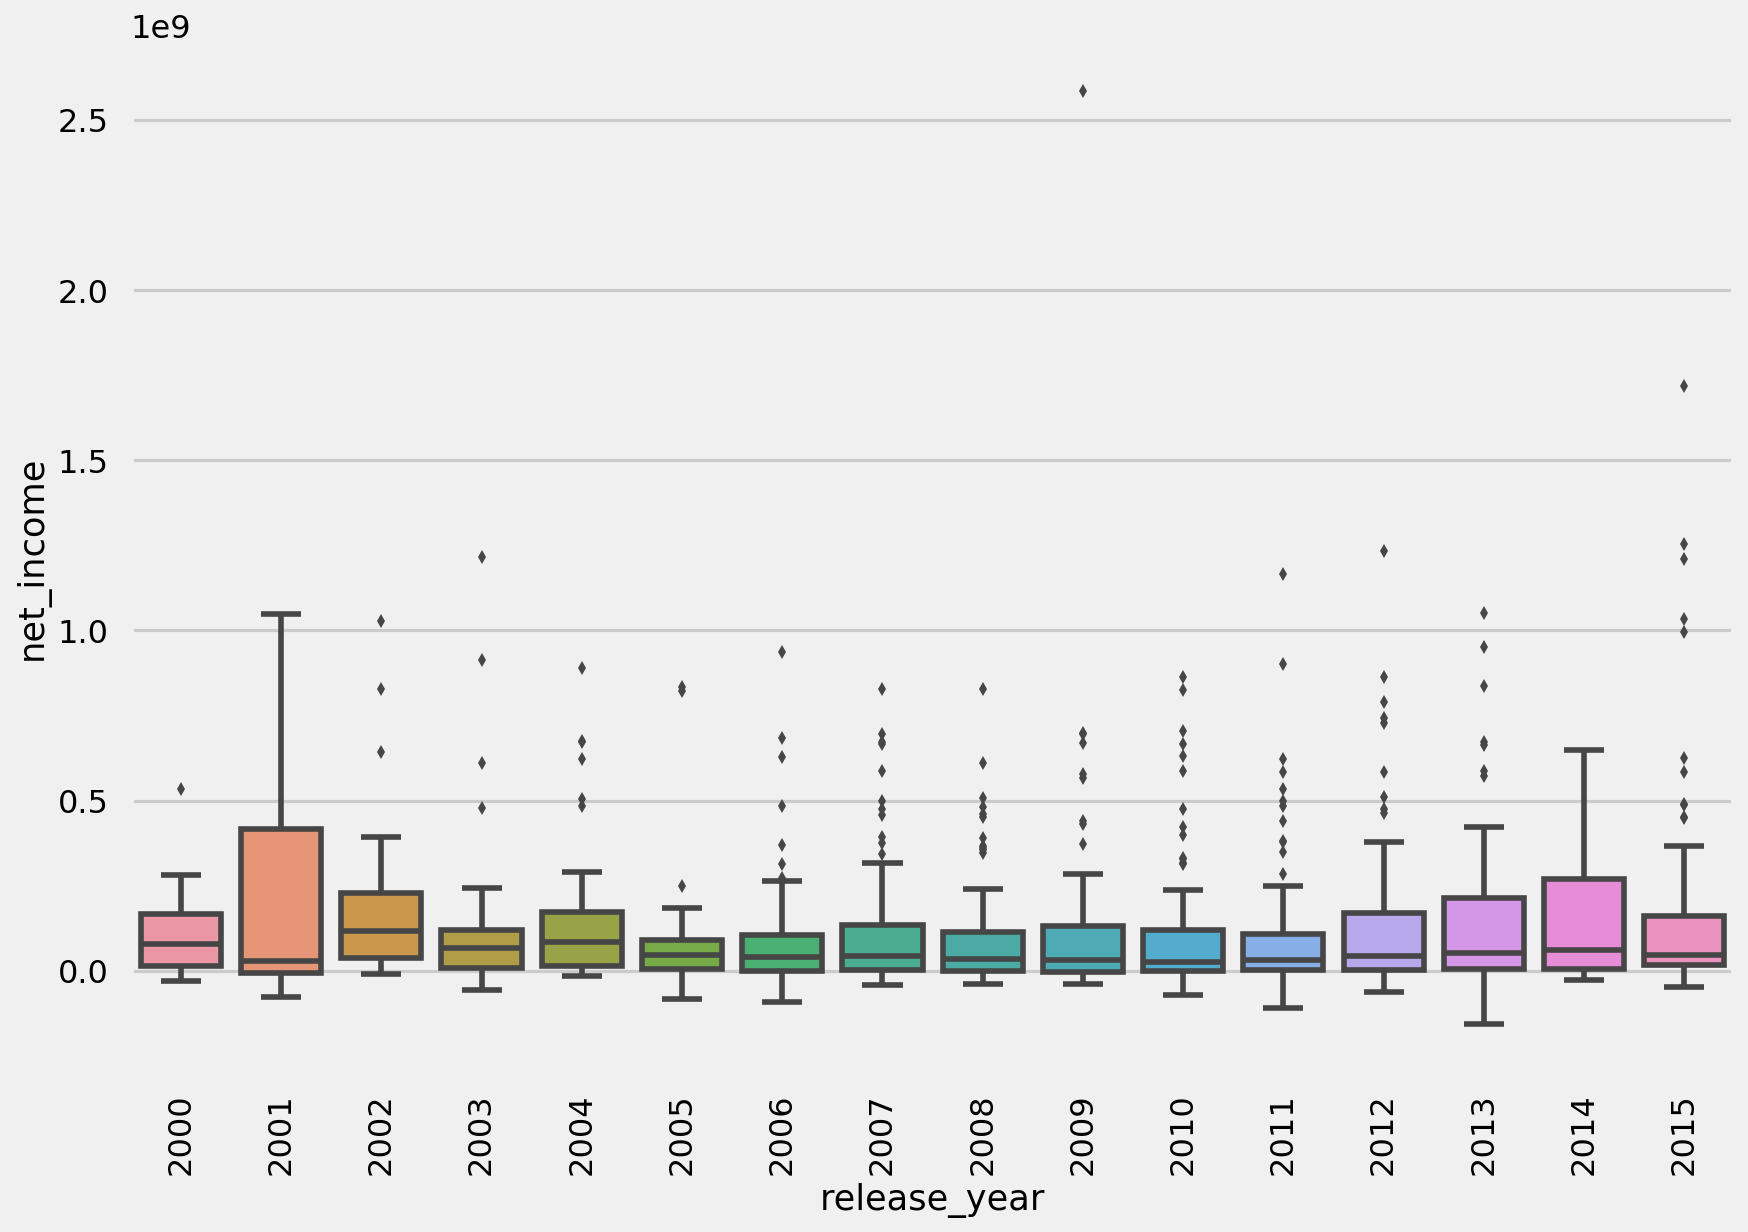

In [30]:
ax = sns.boxplot(x='release_year',
                 y='net_income',
                 data=df_vals[df_vals['release_year'] >= 2000])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Which films in history have netted a billion dollars or more (in 2010 dollars)?

In [31]:
df_vals[df_vals['net_income'] >= 1e9][[
    'id', 'original_title', 'release_year', 'net_income'
]]

,id,original_title,release_year,net_income
0,135397,Jurassic World,2015,"1,254,445,953.24"
275,140607,Star Wars: The Force Awakens,2015,"1,718,723,210.76"
375,168259,Furious 7,2015,"1,210,948,878.38"
1200,99861,Avengers: Age of Ultron,2015,"1,035,032,450.23"
9910,11,Star Wars,1977,"2,750,136,650.92"
10060,19995,Avatar,2009,"2,586,236,847.52"
24361,1893,Star Wars: Episode I - The Phantom Menace,1999,"1,059,439,453.10"
25571,671,Harry Potter and the Philosopher's Stone,2001,"1,048,582,021.48"
31424,12445,Harry Potter and the Deathly Hallows: Part 2,2011,"1,166,009,242.24"
40734,121,The Lord of the Rings: The Two Towers,2002,"1,027,133,804.32"


In [32]:
# Is there any correlation between movie runtime and net income?
df_vals['runtime'].corr(df_vals['net_income'])

0.33892777804141205

Conclusion: there is a weak positive correlation.

### Research Question: Have movie budgets increased over time?

What is the *average* budget (in 2010 dollars) of the movies released each year?

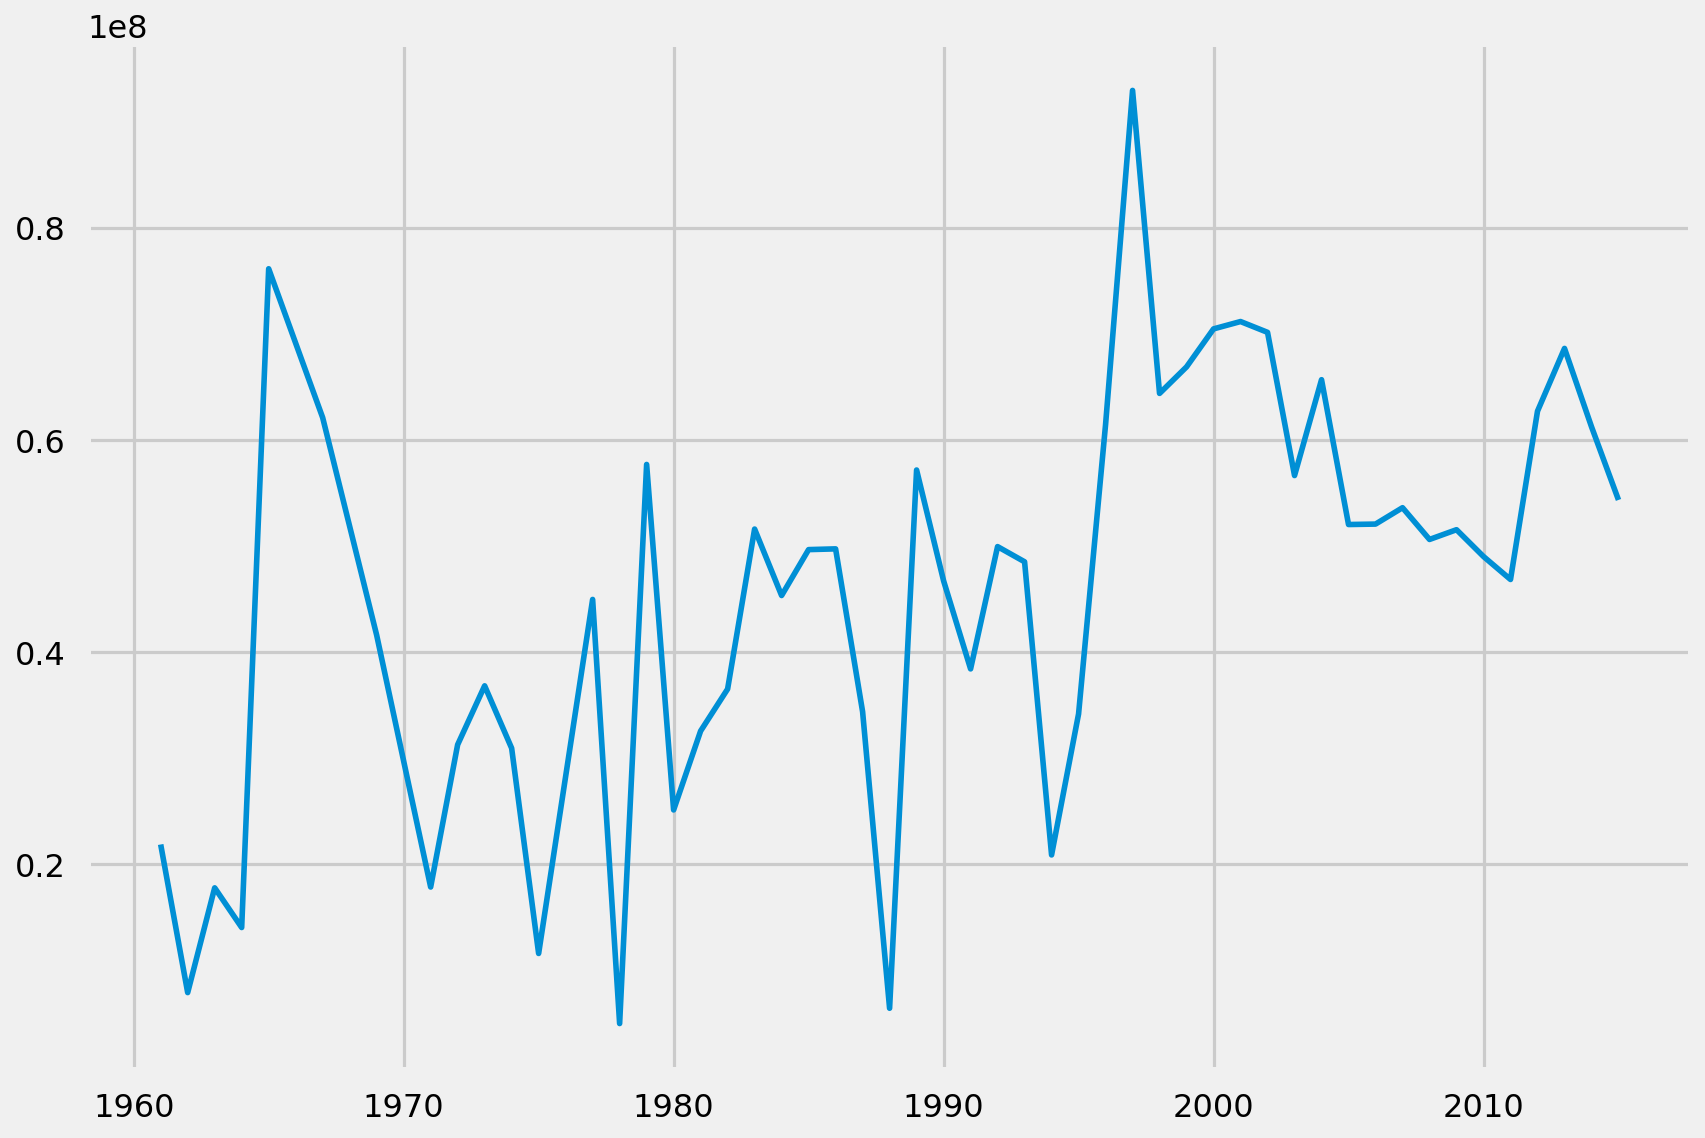

In [33]:
# Drop movies with 0 budget
plt.plot(df_vals[df_vals['budget_adj'] > 0].groupby(
    'release_year').budget_adj.mean())
plt.show()

What were the biggest movie budgets of all time (in 2010 dollars)?

In [34]:
df_vals.sort_values(['budget_adj'], ascending=False)[[
    'id', 'original_title', 'release_year', 'budget_adj', 'net_income'
]].head(10)

,id,original_title,release_year,budget_adj,net_income
31499,1865,Pirates of the Caribbean: On Stranger Tides,2011,"368,371,256.18","622,046,244.16"
65204,285,Pirates of the Caribbean: At World's End,2007,"315,500,574.79","695,152,933.12"
49789,597,Titanic,1997,"271,692,064.21","2,234,713,671.21"
65804,559,Spider-Man 3,2007,"271,330,494.32","665,571,205.90"
17590,38757,Tangled,2010,"260,000,000.00","331,794,936.00"
1200,99861,Avengers: Age of Ultron,2015,"257,599,886.66","1,035,032,450.23"
10260,767,Harry Potter and the Half-Blood Prince,2009,"254,100,108.53","695,176,424.75"
17140,12444,Harry Potter and the Deathly Hallows: Part 1,2010,"250,000,000.00","704,305,868.00"
45094,49529,John Carter,2012,"246,933,513.15","22,925,972.18"
10060,19995,Avatar,2009,"240,886,902.89","2,586,236,847.52"


Let's look at boxplots so we can understand the distribution of budgets.

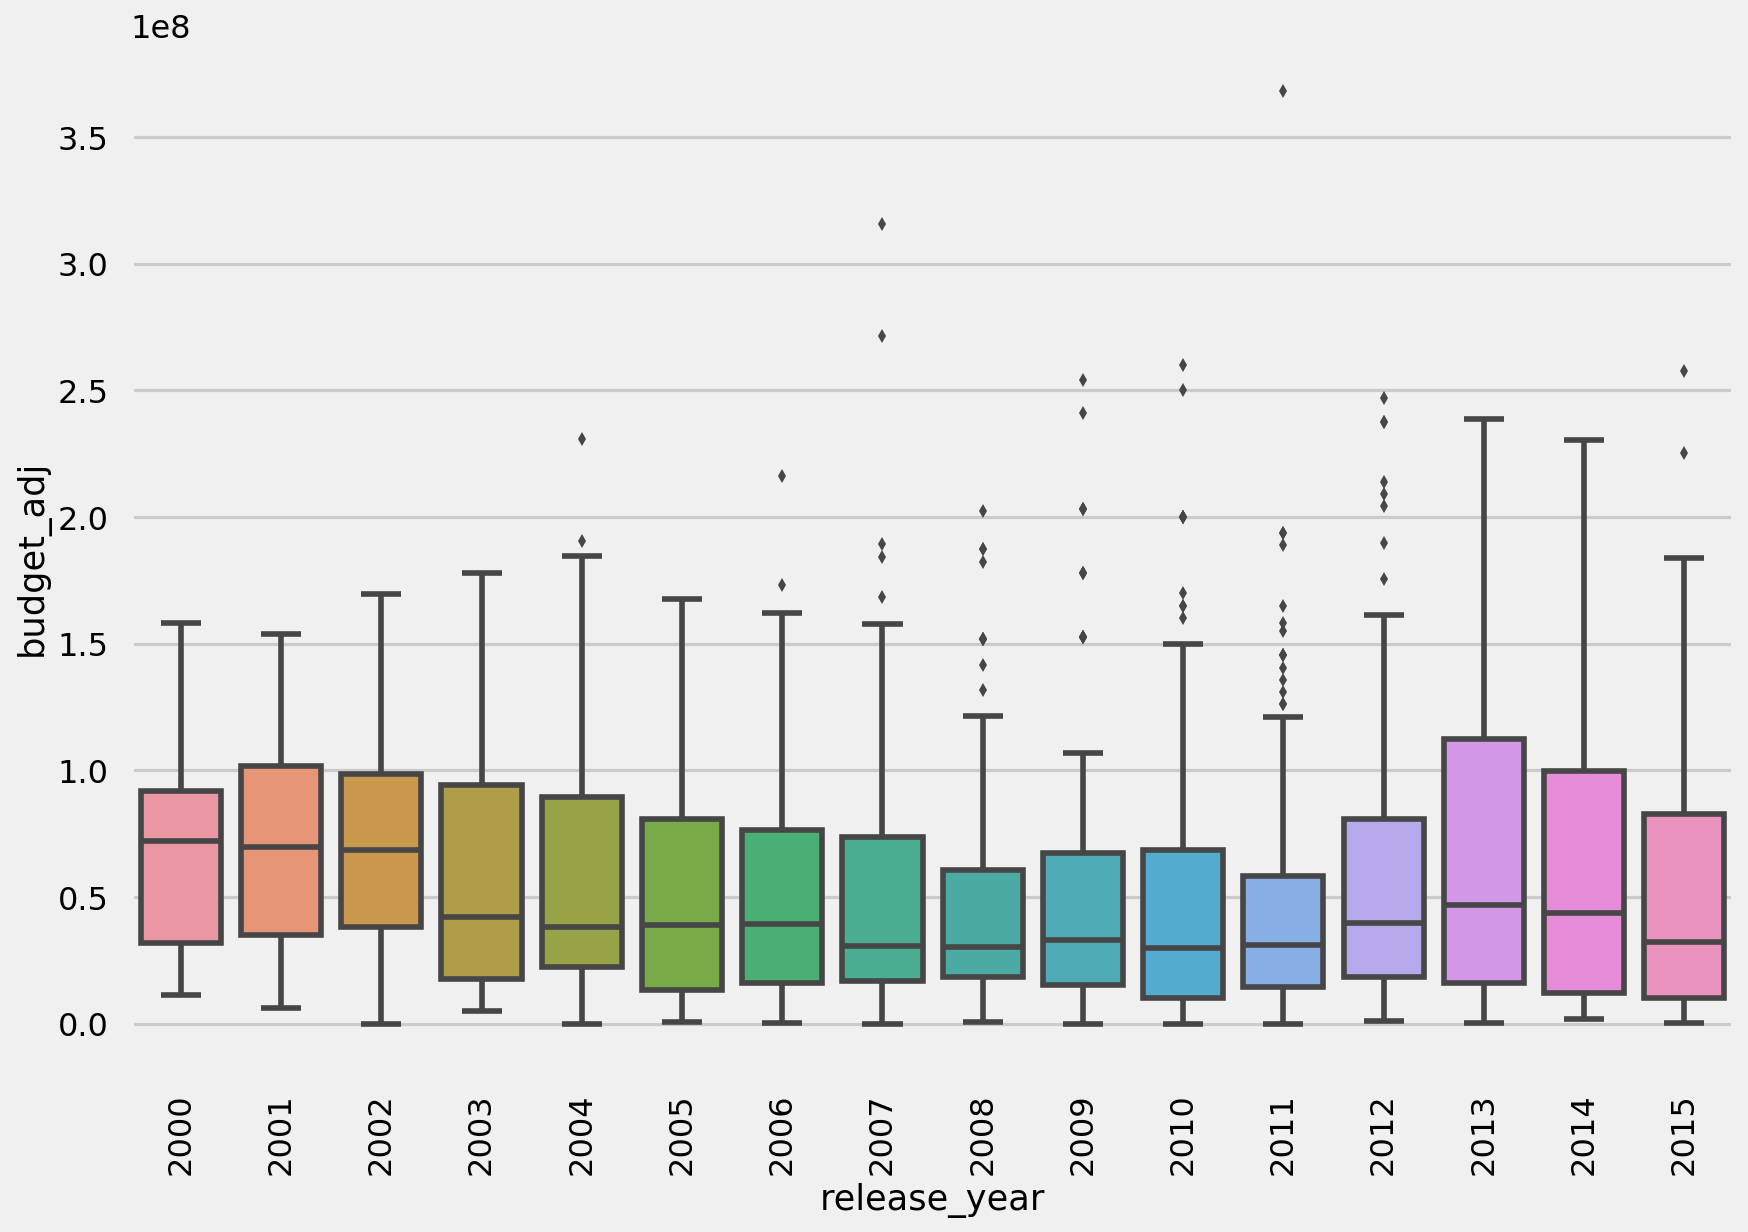

In [35]:
# Drop movies with >0 budget, only year 2000+
df_vals2000 = df_vals.query('budget_adj > 0 & release_year >= 2000')
ax = sns.boxplot(x='release_year',
                 y='budget_adj',
                 data=df_vals2000)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Conclusion: the median movie budget has declined since 2000 with more outliers. There's an increasing inequality between the biggest budget movie and the average movie. Unless it's a blockbuster, your movie's budget has probably declined. So I would say movie budgets on average have not increased over time, but the budgets of the big blockbusters have increased.

What was the most expensive movie released each year?

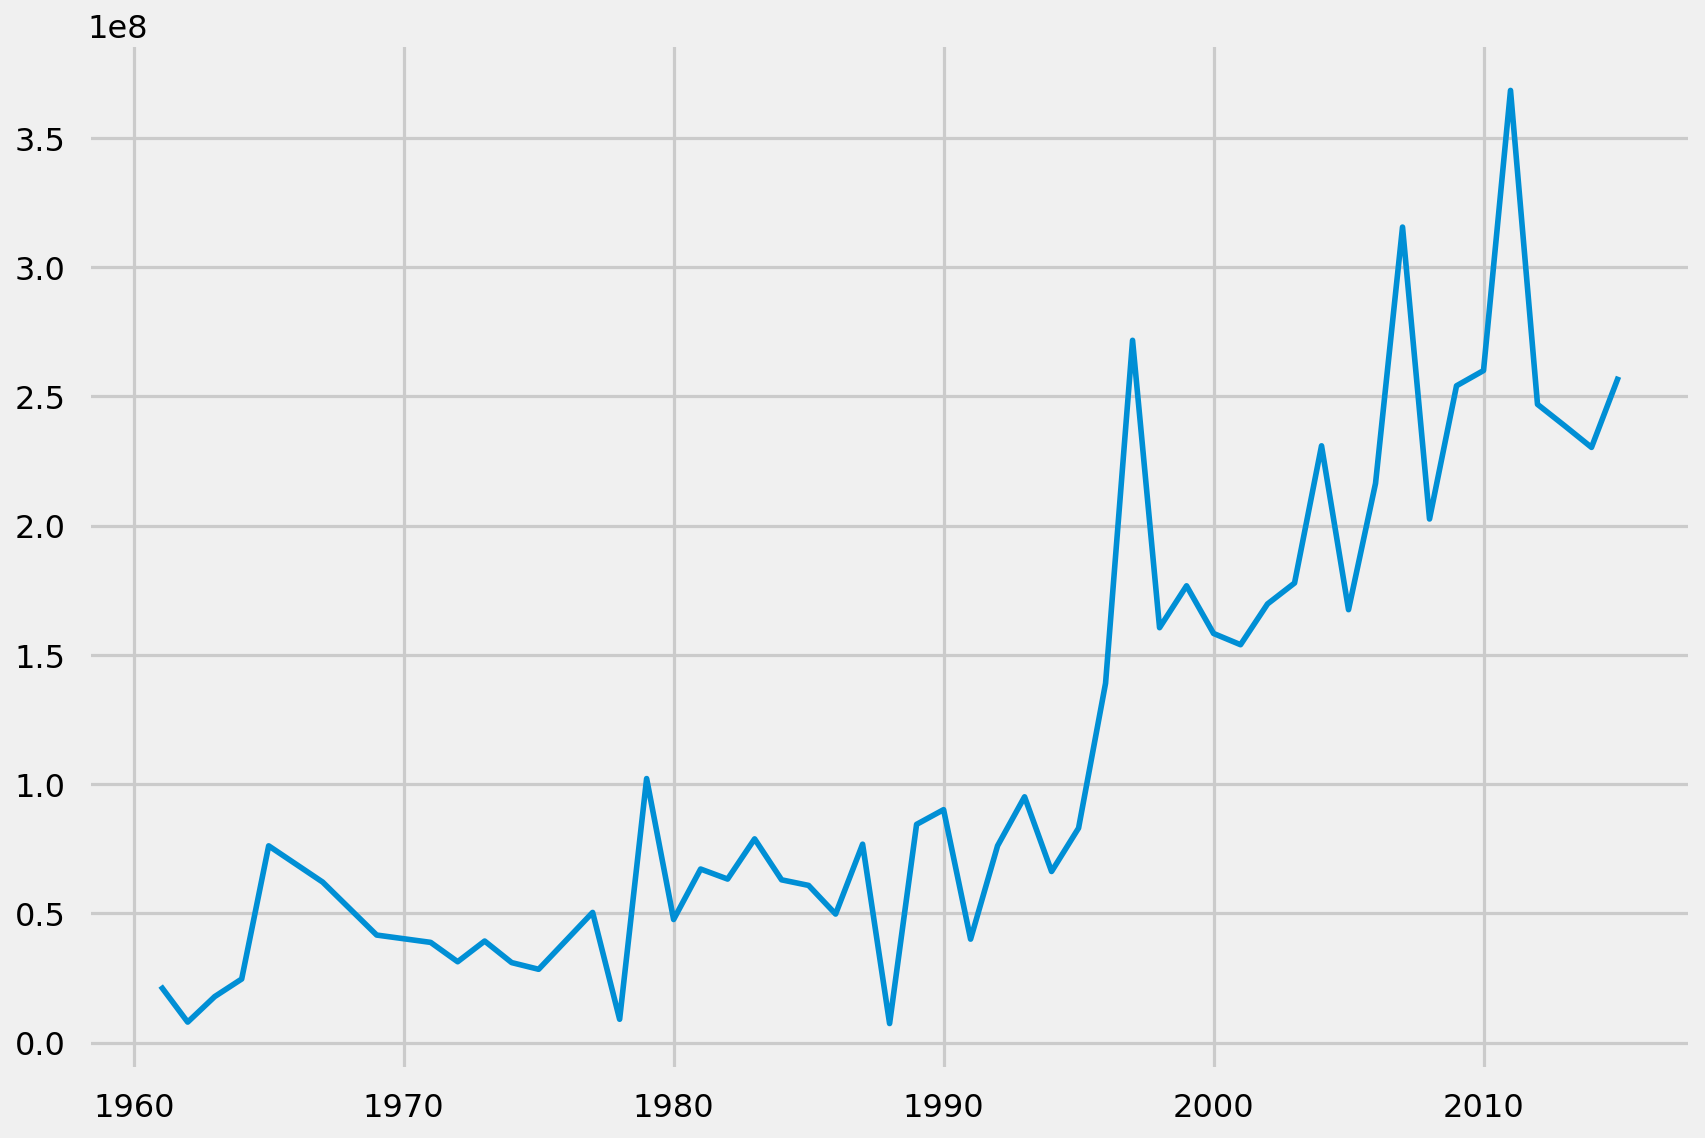

In [36]:
# Drop movies with 0 budget
plt.plot(df_vals[df_vals['budget_adj'] > 0].groupby(
    'release_year').budget_adj.max())
plt.show()

### Research Question: Are blockbuster movies longer than non-blockbusters?

I define a blockbuster as a movie that has a net income of at least one hundred million dollars. Here I plot a histogram of blockbusters compared to non-blockbusters by runtime, grouped into 30 minute bins. We can see that movies that are 2+ hours long are more likely to be blockbusters than not.

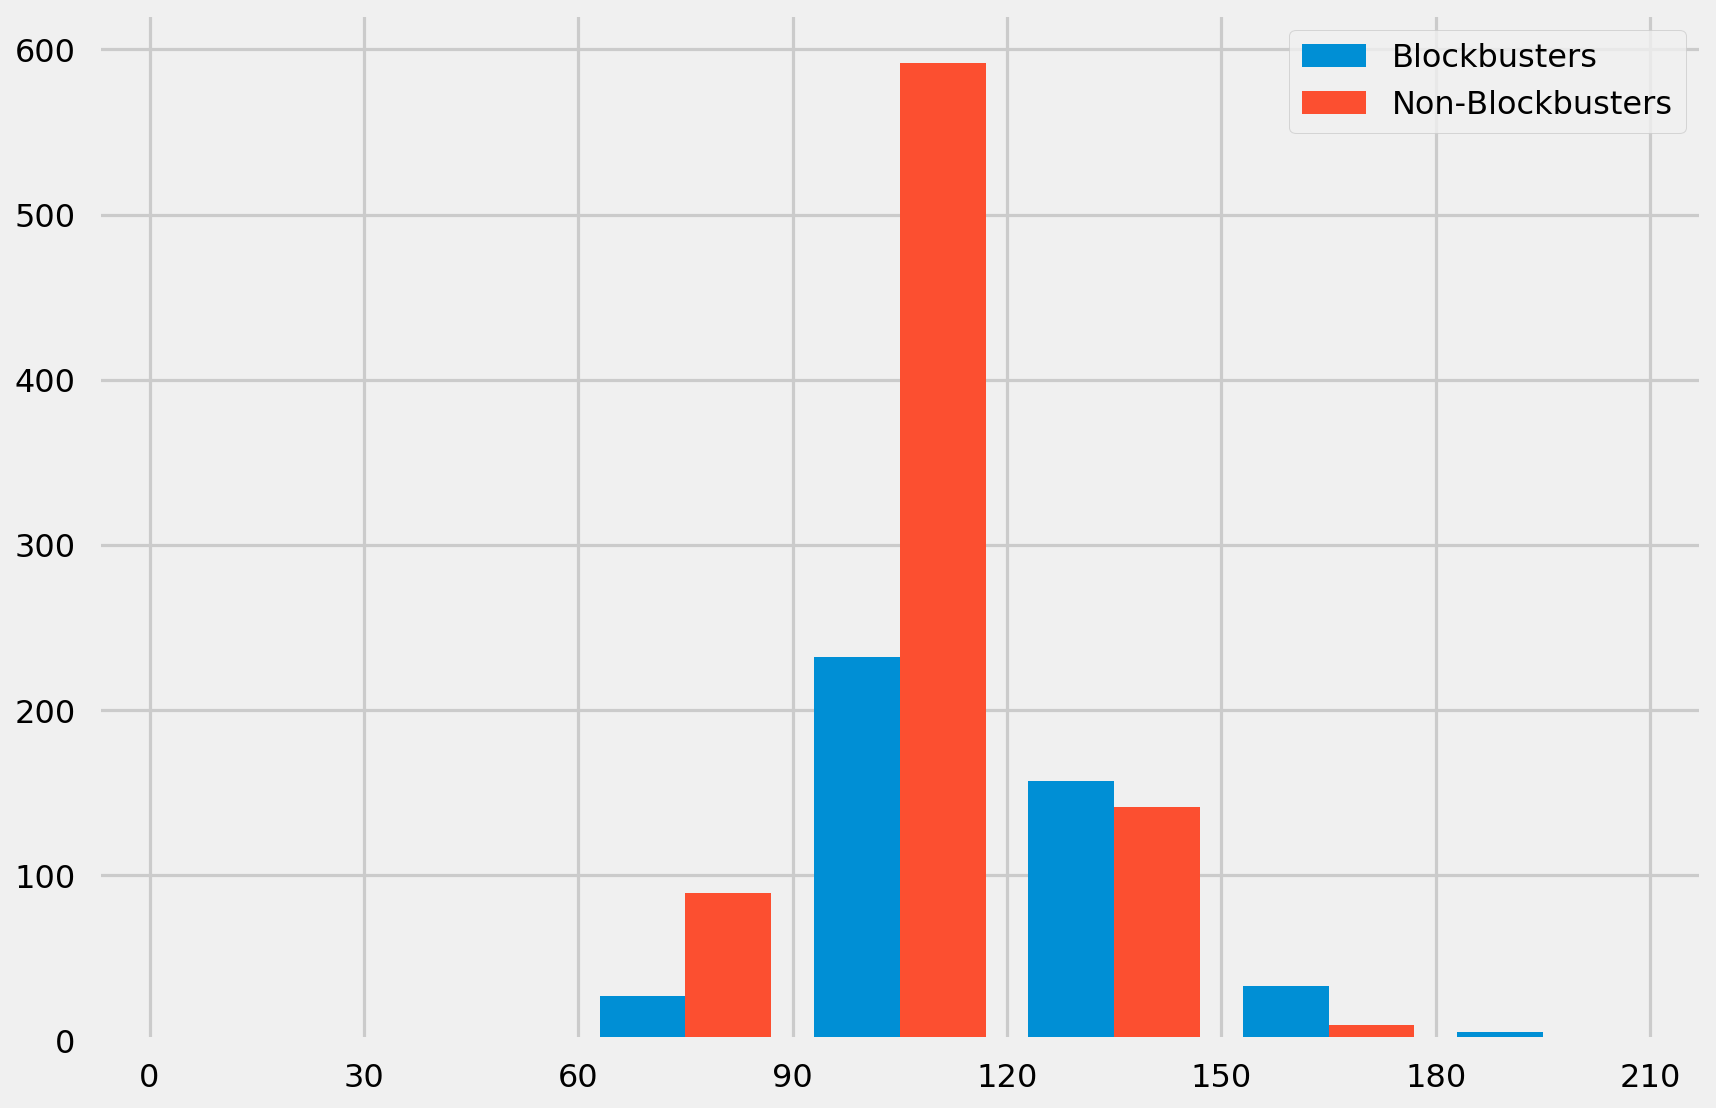

In [37]:
blockbusters = df_vals.query('net_income >= 1e8')
alltherest = df_vals.query('net_income < 1e8')

fig, ax = plt.subplots()
bins = [0, 30, 60, 90, 120, 150, 180, 210]
ax.set_xticks(bins)
ax.hist([blockbusters['runtime'], alltherest['runtime']],
        bins=bins,
        label=['Blockbusters', 'Non-Blockbusters'])
ax.legend(loc='upper right')
plt.show()

In [38]:
print("Blockbusters:", blockbusters.runtime.describe())
print("Non-Blockbusters:", alltherest.runtime.describe())

Blockbusters: count   454.00
mean    117.39
std      21.53
min      80.00
25%     101.00
50%     115.00
75%     129.75
max     201.00
Name: runtime, dtype: float64
Non-Blockbusters: count   832.00
mean    106.40
std      15.88
min      63.00
25%      95.00
50%     104.00
75%     115.00
max     188.00
Name: runtime, dtype: float64


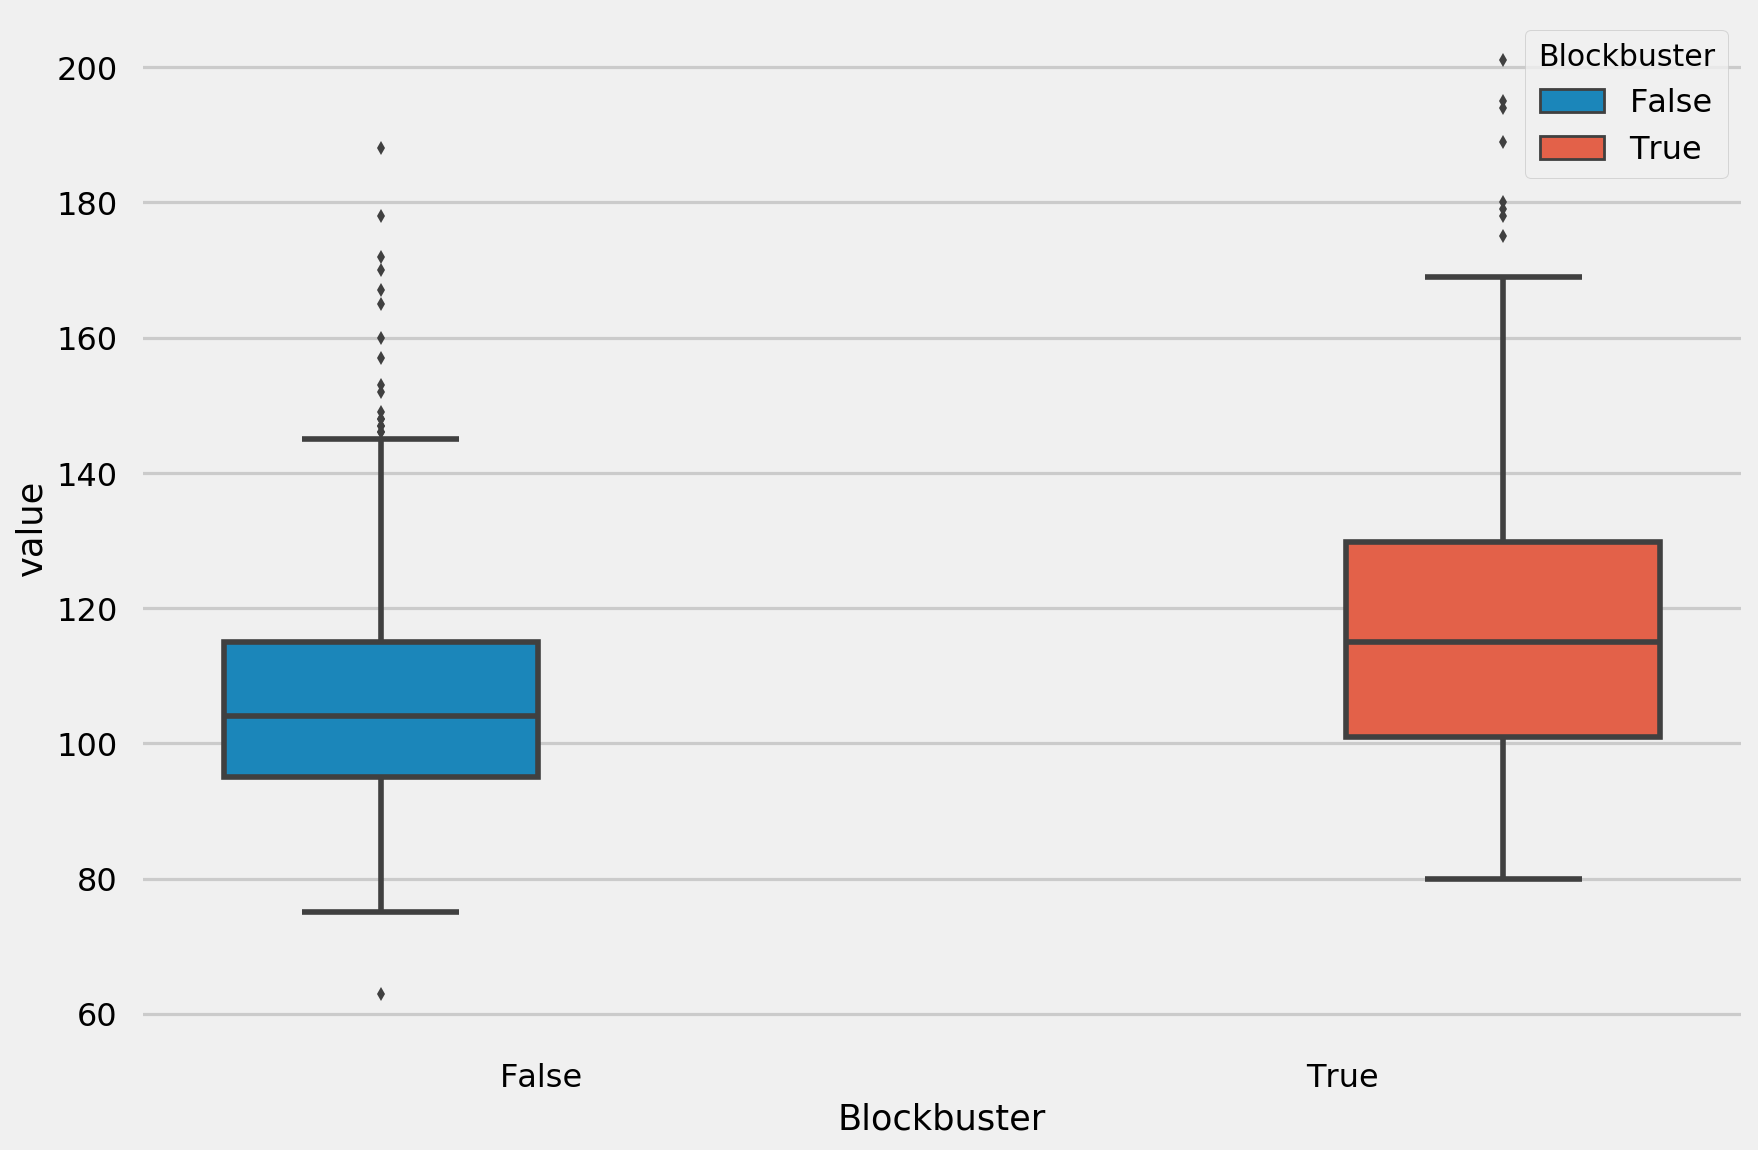

In [39]:
data1 = pd.DataFrame(blockbusters,
                     columns=['runtime']).assign(Blockbuster=True)
data2 = pd.DataFrame(alltherest, columns=['runtime']).assign(Blockbuster=False)

cdf = pd.concat([data1, data2])
mdf = pd.melt(cdf, id_vars=['Blockbuster'])

ax = sns.boxplot(x="Blockbuster", y="value", hue="Blockbuster", data=mdf)
plt.show()

In [40]:
stats.ttest_ind(blockbusters['runtime'], alltherest['runtime'])

Ttest_indResult(statistic=10.42111754706735, pvalue=1.8194114863425537e-24)

We can see from the t-test that although the median blockbuster is longer than the median non-blockbuster, there is no statistical significance to the difference.

When we look at budgets, we see a similar effect. If you're making a movie of over 2 hours, it's more likely you'll have a budget of more than fifty million dollars. We don't know cause-and-effect here though: if you have a bigger budget do you make a longer movie, or is the case that if you make a longer movie you require a bigger budget?

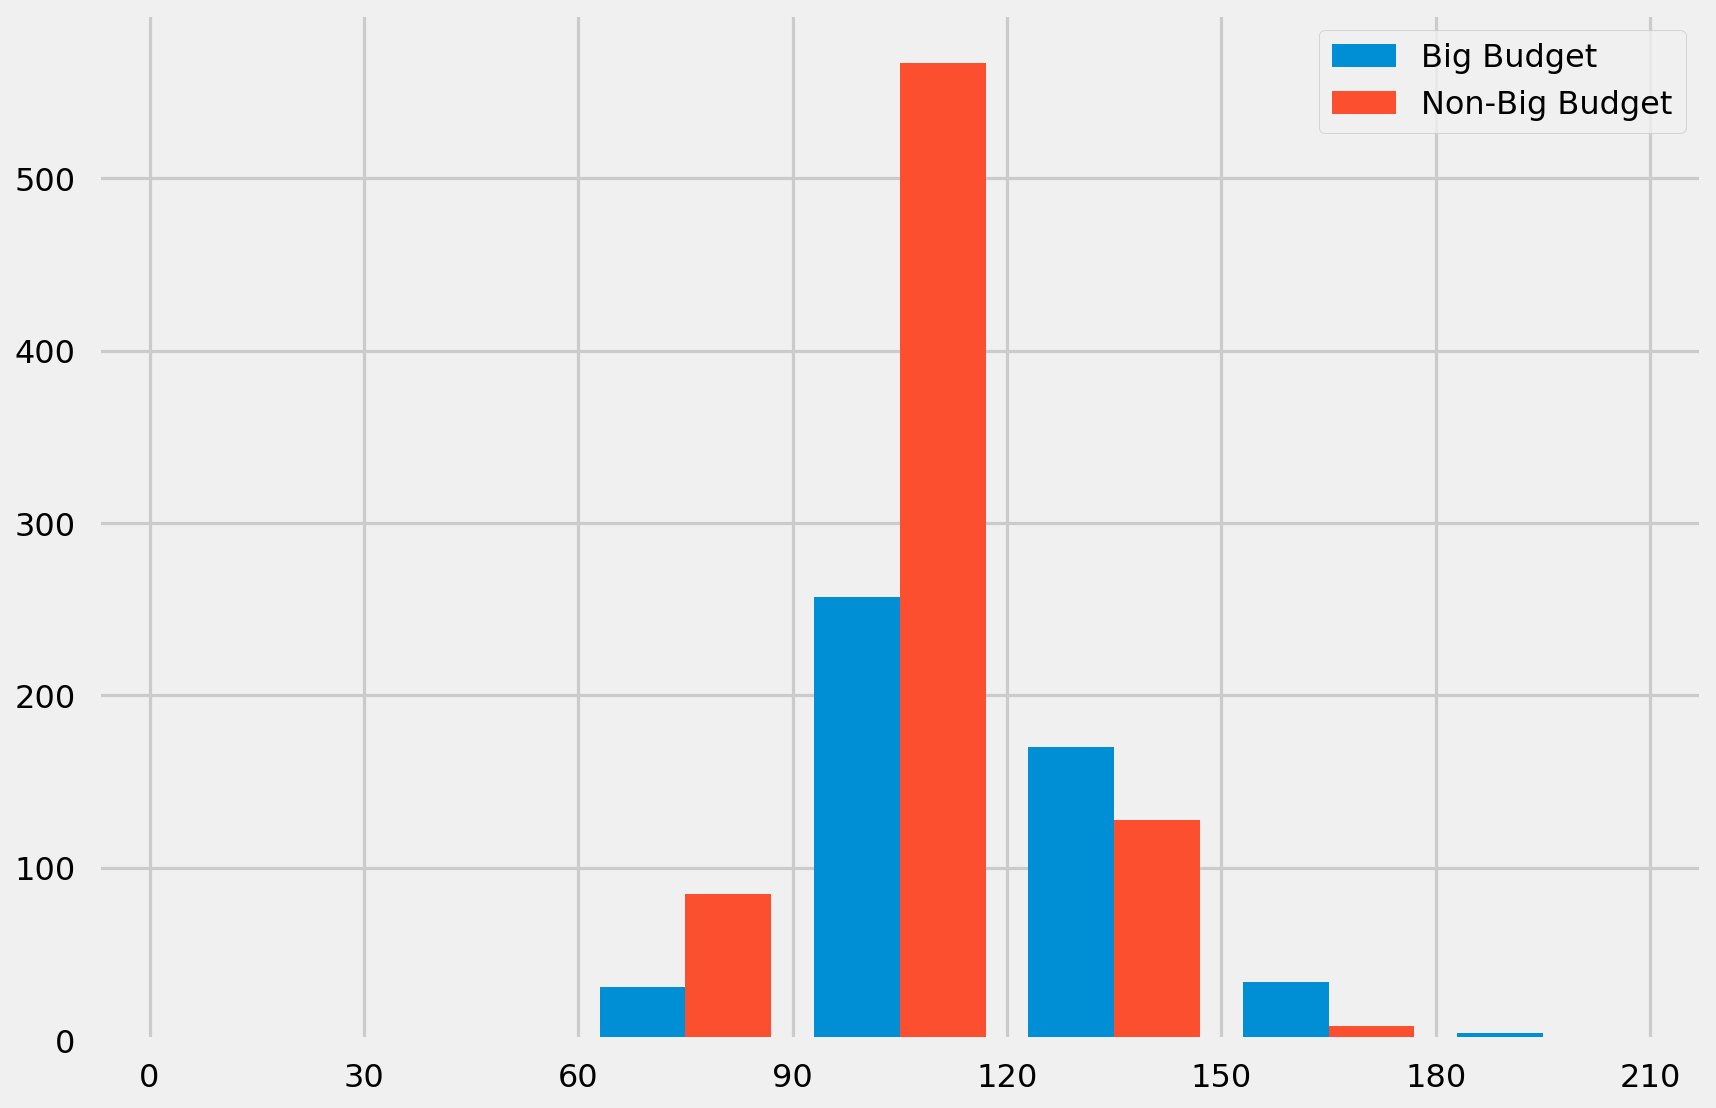

In [41]:
bigbudget = df_vals.query('budget_adj >= 50000000')
alltherest = df_vals.query('budget_adj < 50000000')

fig, ax = plt.subplots()
bins = [0, 30, 60, 90, 120, 150, 180, 210]
ax.set_xticks(bins)
ax.hist([bigbudget['runtime'], alltherest['runtime']],
        bins=bins,
        label=['Big Budget', 'Non-Big Budget'])
ax.legend(loc='upper right')
plt.show()

### Research Question: What is the most profitable genre?

To look at net income by genre, we're going to need to create a new dataframe that joins `df_film` (to get genres) and `df_vals` (to get net income). 

In [42]:
# Join the two dfs on the id key
result = pd.merge(df_film, df_vals, on='id', how='inner')

In [43]:
# We only care about a few columns, easier to just grab them then
# to drop the ones we don't want later
result = result[[
    'id', 'original_title_x', 'genres', 'revenue_adj', 'budget_adj',
    'net_income'
]]

# We ended up with original_title columns from both dfs, let's rename
# it back to original_title
result.rename(columns={'original_title_x': 'original_title'}, inplace=True)

# We have a bunch of duplicates from the expanded set, remove them
result.drop_duplicates(inplace=True)
result.head()

,id,original_title,genres,revenue_adj,budget_adj,net_income
0,135397,Jurassic World,Action,"1,392,445,892.52","137,999,939.28","1,254,445,953.24"
5,135397,Jurassic World,Adventure,"1,392,445,892.52","137,999,939.28","1,254,445,953.24"
10,135397,Jurassic World,Science Fiction,"1,392,445,892.52","137,999,939.28","1,254,445,953.24"
15,135397,Jurassic World,Thriller,"1,392,445,892.52","137,999,939.28","1,254,445,953.24"
100,76341,Mad Max: Fury Road,Action,"348,161,292.49","137,999,939.28","210,161,353.21"


In [44]:
result.groupby('genres').net_income.sum().sort_values(ascending=False)

genres
Adventure         98,456,298,773.66
Action            88,288,139,536.53
Thriller          51,317,872,536.73
Science Fiction   49,058,392,574.84
Fantasy           46,129,163,396.99
Comedy            45,795,267,298.12
Drama             43,013,208,139.53
Family            42,587,558,778.80
Animation         28,823,610,050.17
Romance           18,211,014,055.05
Crime             16,132,383,057.04
Horror            13,179,400,828.52
Mystery           10,054,564,194.13
Music              3,881,078,931.43
War                3,342,155,586.45
History            2,288,072,621.76
Western              987,440,385.54
Documentary          309,092,494.58
Foreign               -1,312,284.00
Name: net_income, dtype: float64

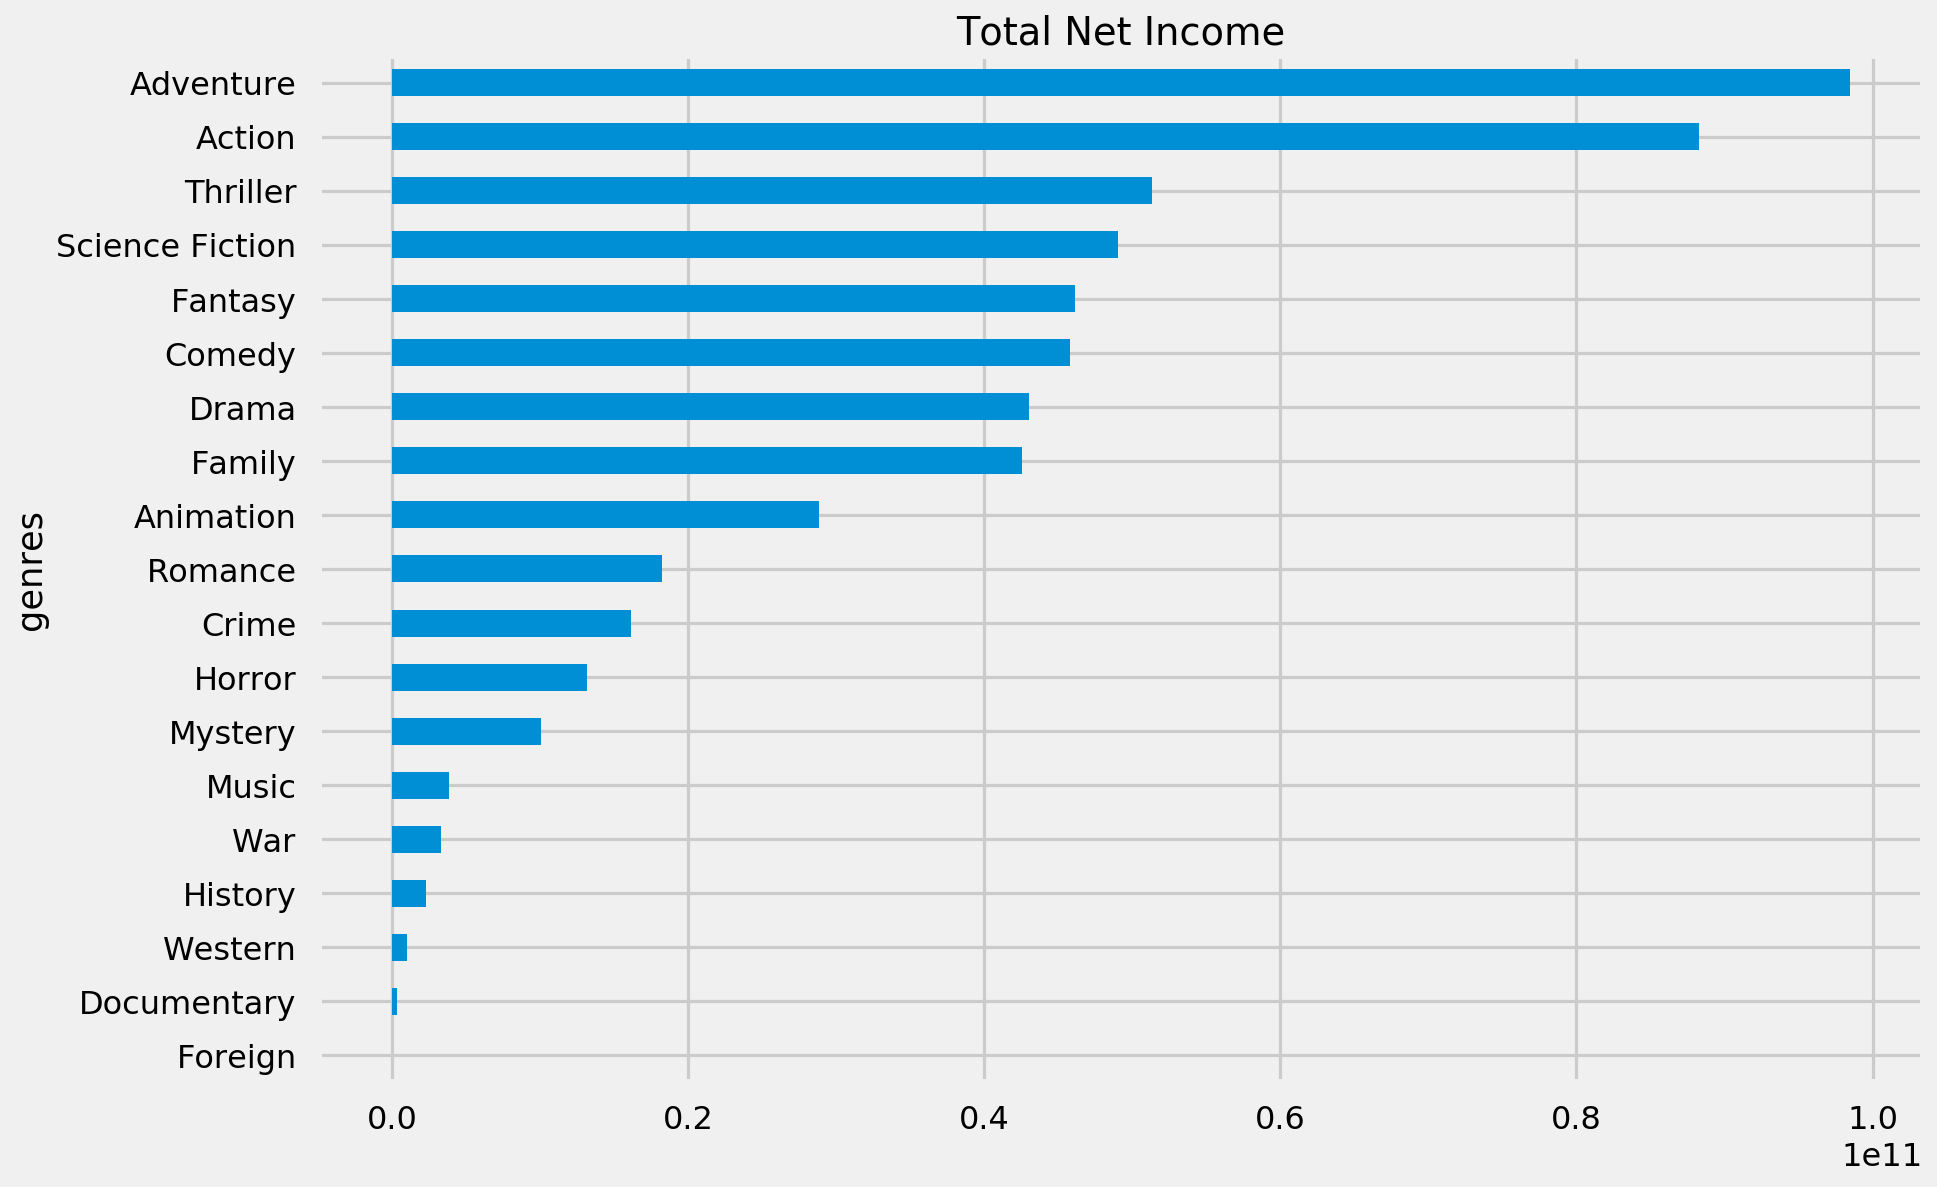

In [45]:
result.groupby('genres')['net_income'].sum().sort_values(
    ascending=True).plot.barh(title="Total Net Income")
plt.show()

We can see that the "Adventure" and "Action" genres are the most profitable in terms of total earnings. But let's lok at median earnings too because some categories have many more movies than others.

In [46]:
result.groupby('genres').net_income.median().sort_values(ascending=False)

genres
Adventure         206,548,546.11
Animation         173,046,127.20
Fantasy           147,255,456.74
Family            145,160,115.59
Action             87,844,176.72
Science Fiction    73,775,255.80
War                59,760,706.04
Mystery            49,842,431.91
Western            45,524,262.55
Horror             42,824,791.60
Comedy             42,682,397.09
Thriller           38,595,818.80
Music              38,125,266.45
History            36,597,934.24
Romance            27,402,303.09
Crime              25,051,586.39
Drama              23,666,130.70
Documentary         4,789,857.13
Foreign            -1,312,284.00
Name: net_income, dtype: float64

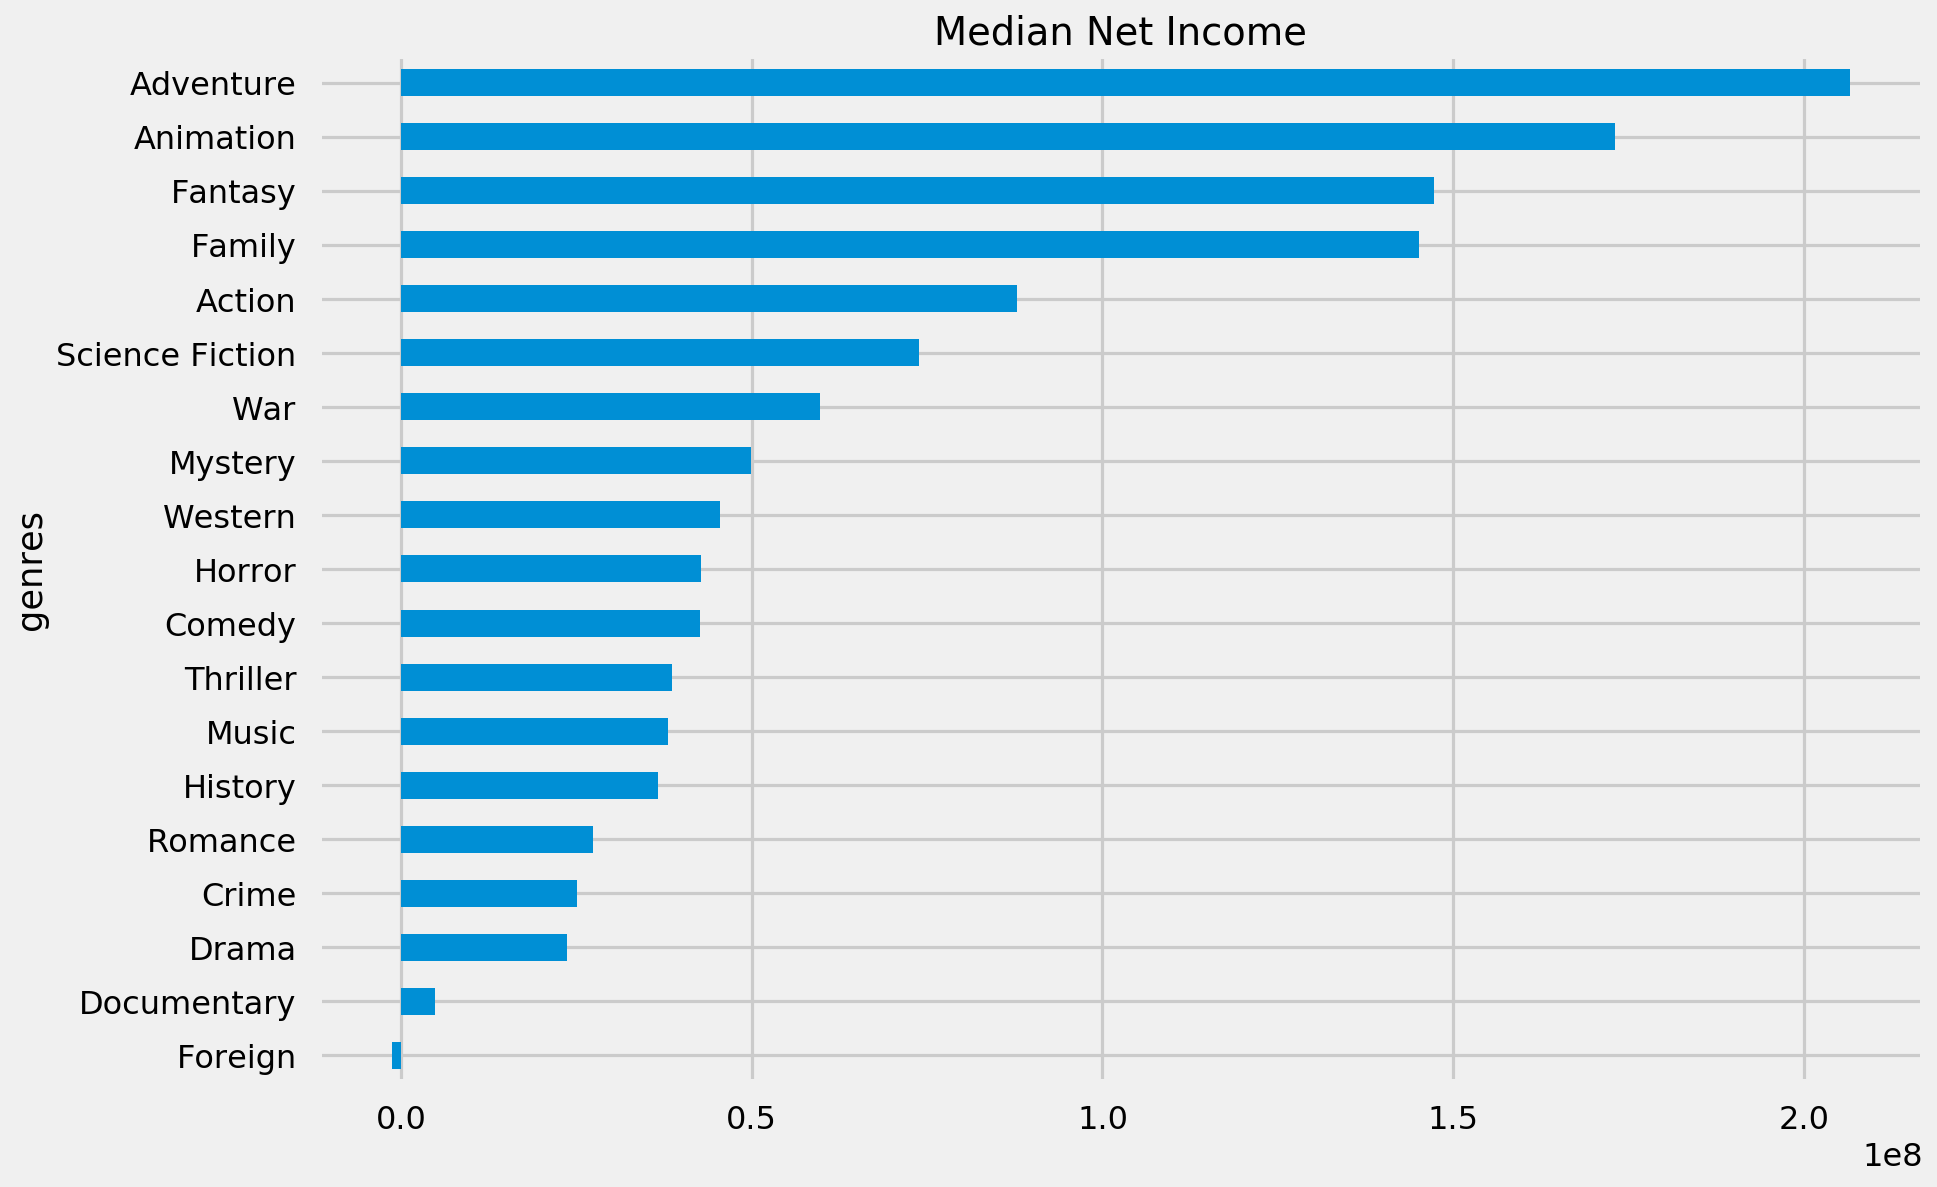

In [47]:
result.groupby('genres')['net_income'].median().sort_values(
    ascending=True).plot.barh(title="Median Net Income")
plt.show()

Here we can see that in median net income, Adventure is still number one. But Animation has jumped up to the second spot! The median net income on an animated film is \\$173M. Wow. We missed that when we looked at total earnings, presumably because there are far fewer animated movies in our data set than action.

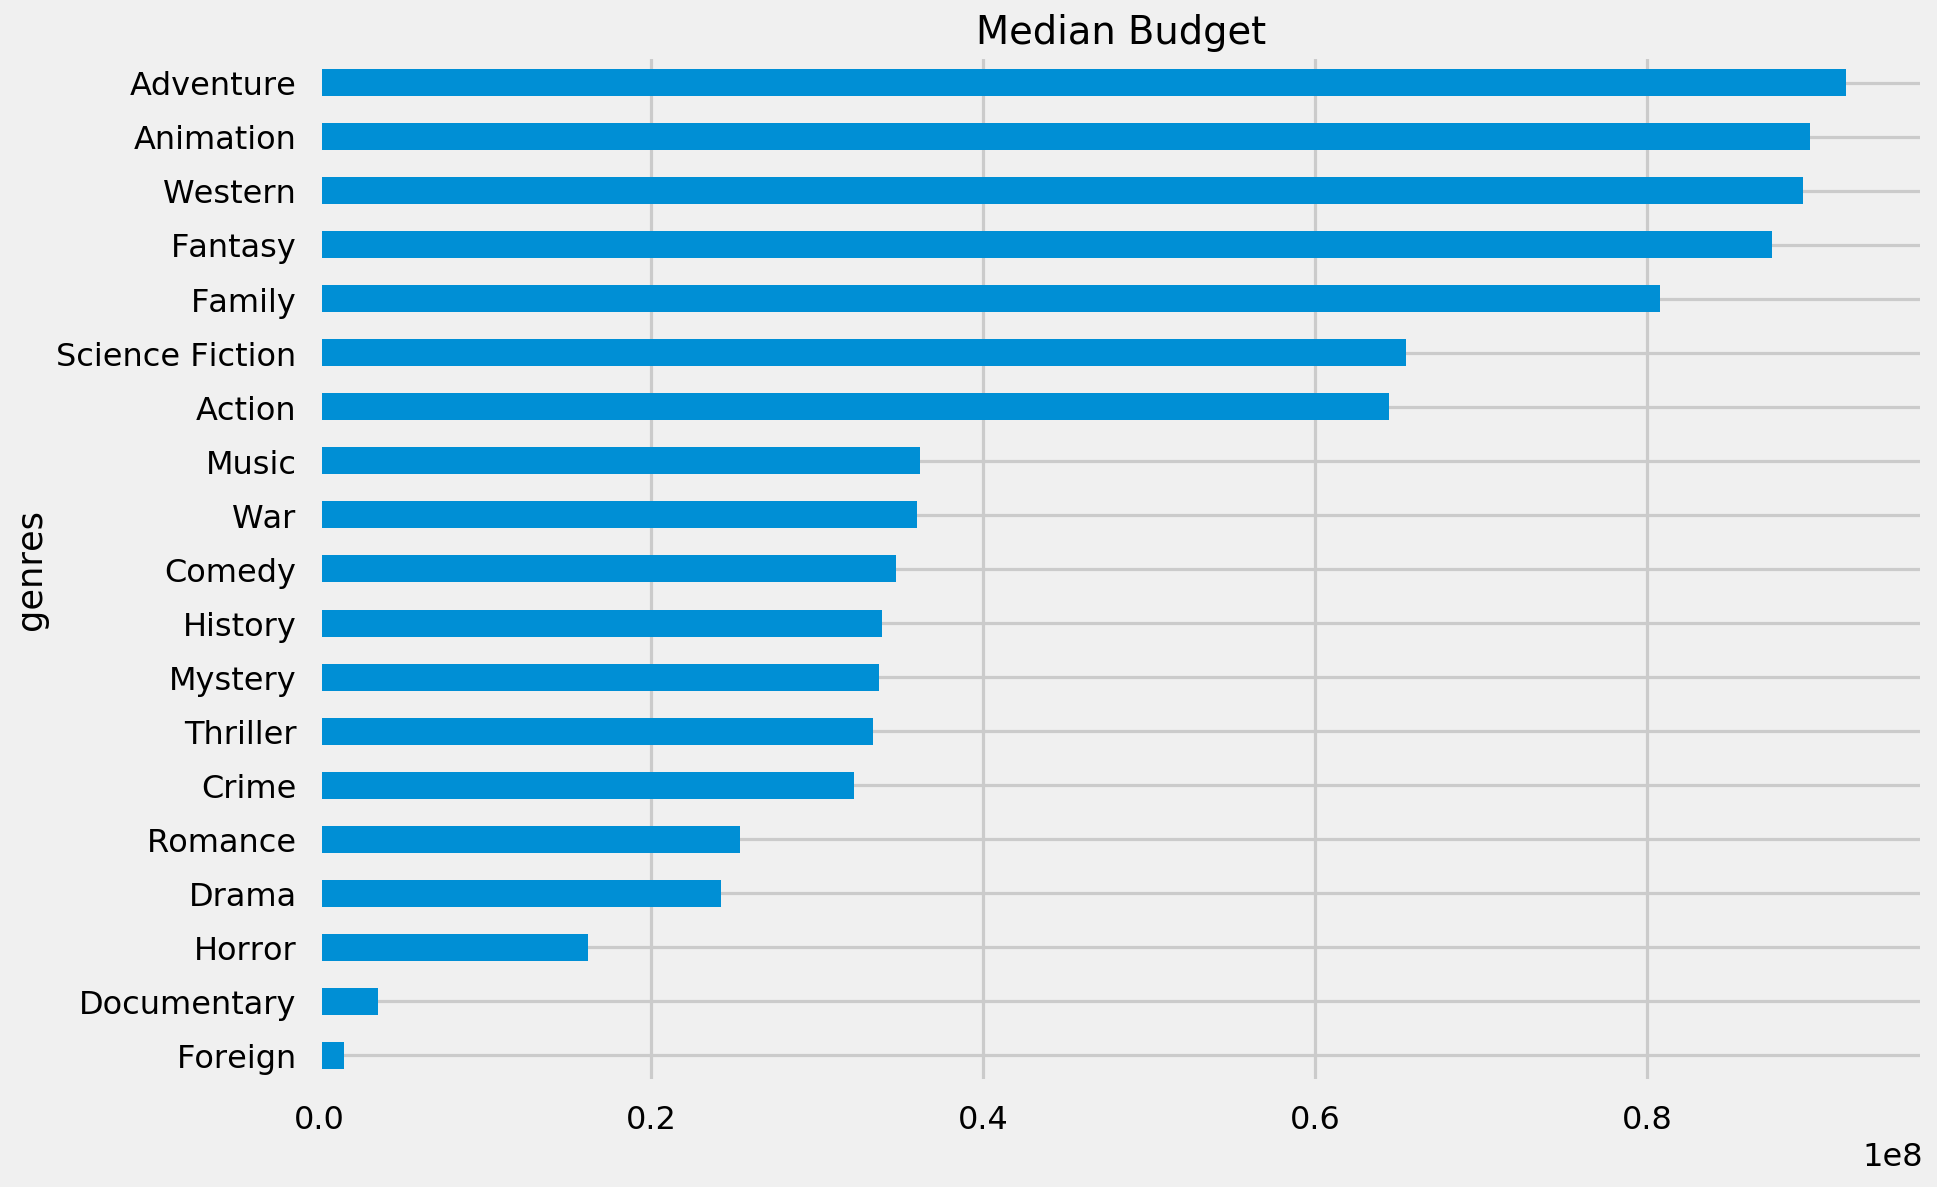

In [48]:
result.groupby('genres')['budget_adj'].median().sort_values(
    ascending=True).plot.barh(title="Median Budget")
plt.show()

Animation movies are profitable, but they also have huge budgets. The median Animation budget is almost as big as the median Adventure budget. So it's good that they're also profitable!

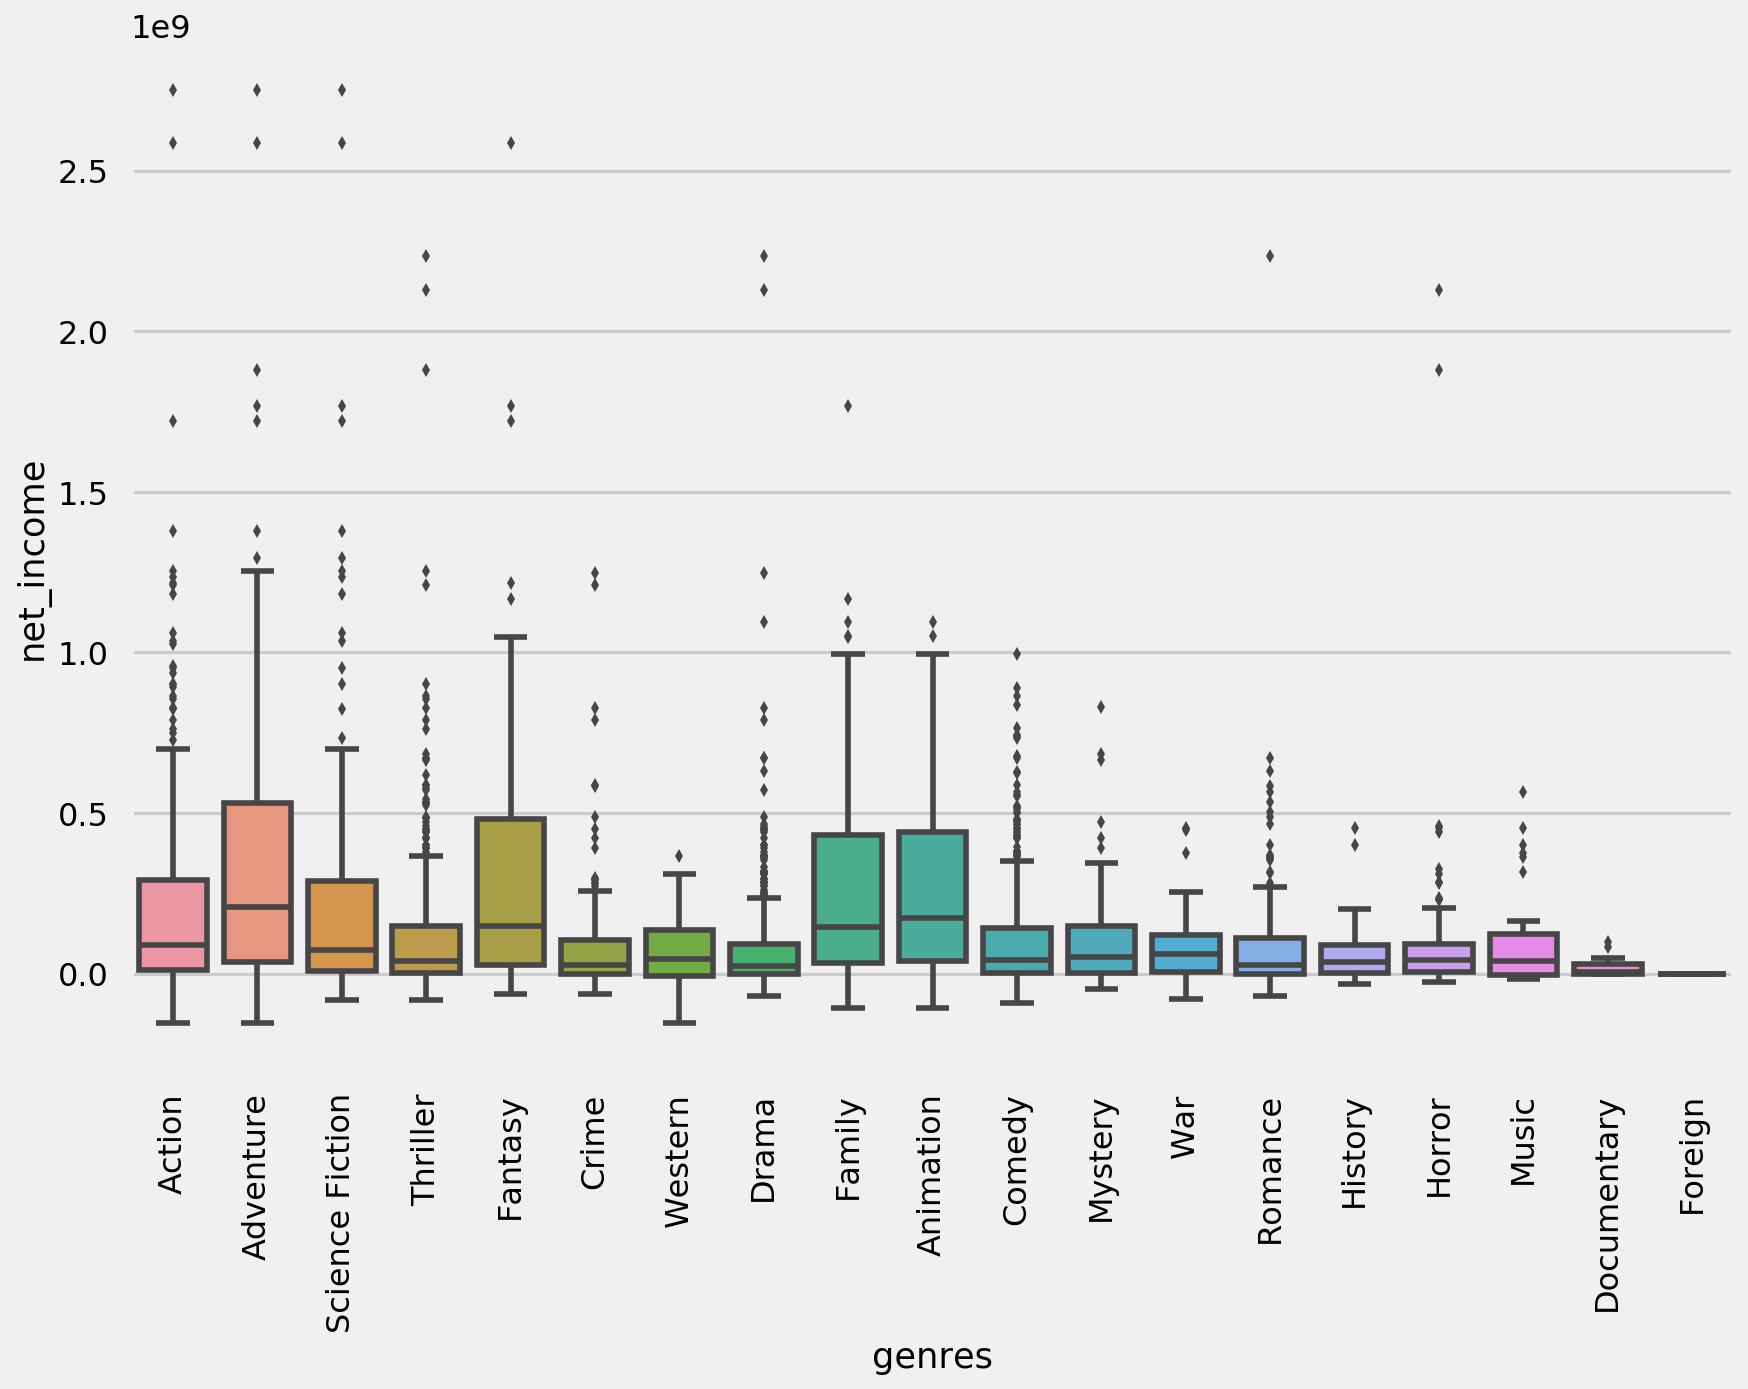

In [49]:
ax = sns.boxplot(x='genres', y='net_income', data=result)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()